In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
#import plotly.figure_factory as ff



df_election = pd.read_csv('election_train.csv')
df_demograhics = pd.read_csv('demographics_train.csv')

#Converting the column value into column header for party as there are only two parties republic and democratic
df2 = df_election.pivot_table(index=['State','County','Year','Office'], columns='Party', values='Votes',aggfunc=np.sum)
df_election = pd.DataFrame(df2.to_records())




In [2]:
# Merging the two dataframes after removing the extra spaces and the word county from end and 
# also converting the join column values into same lower case. 
df_election['County'] = df_election['County'].apply(lambda x: (x.replace(' County','')).lower().strip())
df_states = pd.read_csv('States.csv')
df_states.columns= ['State_Name','Abbreviation']
df_demograhics['County'] = df_demograhics['County'].apply(lambda x: x.lower().strip())
df_election=  pd.merge(df_election,df_states,left_on='State',right_on='Abbreviation')
df_election.drop(['Abbreviation','State'],axis=1,inplace=True)
df_election.rename(columns={'State_Name':'State'},inplace=True)

df_combined = pd.merge(df_demograhics,df_election,left_on=['State','County'],right_on=['State','County'],how='inner')


In [3]:
# here we are dropping the rows which has zero values for all the three attributes i.e. Citizen Voting-Age Population,
# Democratic, Republican as we can't use them for analysis
indexs = df_combined[ (df_combined['Citizen Voting-Age Population'] == 0) & (df_combined['Democratic'] == 0)&(df_combined['Republican'] ==0)].index
df_combined.drop(indexs , inplace=True)

In [15]:
# Creating the new column named 'party' which has the value 1 if democratic party wins and value 0 if republic party wins.
df_combined['Party'] = df_combined.apply(lambda row: 1 if (row['Democratic']>row['Republican']) else 0, axis=1)

In [16]:
#calculating the mean of median income party wise
mean_medianIncome_democratic = df_combined[df_combined['Party']==1]['Median Household Income'].mean()
mean_medianIncome_republican = df_combined[df_combined['Party']==0]['Median Household Income'].mean()

print('mean_medianIncome_democratic:',mean_medianIncome_democratic)
print('mean_medianIncome_republican:',mean_medianIncome_republican)


# mean median income of demoractic is greater than mean median income of republic county

# here we are applying null hypothesis to check whether this has happen by chance or not.

# null hypothesis is mean median income of demoractic is equal to mean median income of republic county.
# alternate hypothesis is mean median income of demoractic is not equal to the mean median income of republic county.

[statistic,pvalue]=st.ttest_ind(df_combined[df_combined['Party']==1]['Median Household Income'] ,
             df_combined[df_combined['Party']==0]['Median Household Income'], axis=0, equal_var=False, nan_policy='omit')

#since this method returns two tailed value for p and we want only one tail value so dividing it by 2
print('P value for median income',pvalue)

print('statistics:',statistic)

# since the p value is less than significance level so we can reject the null hypothesis
# which means Median Household Income mean of demoratic is greater than republican not by chance.

mean_medianIncome_democratic: 53798.732307692306
mean_medianIncome_republican: 48746.81954022989
P value for median income 7.149437363182572e-08
statistics: 5.479141589767388


In [7]:


mean_totalPopulation_democratic  = df_combined[df_combined['Party']==1]['Total Population'].mean()
mean_totalPopulation_republican  = df_combined[df_combined['Party']==0]['Total Population'].mean()

print('mean_totalPopulation_republican :',mean_totalPopulation_republican)
print('mean_totalPopulation_democratic :',mean_totalPopulation_democratic )

# null hypothesis is mean Total Population of demoractic is equal to mean Total Population of republic county.
# alternate hypothesis is mean Total Population of demoractic is not equal to the mean Total Population of republic county.

[statistic,pvalue]=st.ttest_ind(df_combined[df_combined['Party']==1]['Total Population'] ,
             df_combined[df_combined['Party']==0]['Total Population'], axis=0, equal_var=False, nan_policy='omit')

#since this method returns two tailed value for p and we want only one tail value so dividing it by 2
print('P value for mean totalPopulation :',pvalue)

print('statistics:',statistic)

# since the p value is less than significance level so we can reject the null hypothesis
# which means total population mean of demoratic is greater than republican not by chance.



mean_totalPopulation_republican : 53864.6724137931
mean_totalPopulation_democratic : 300998.3169230769
P value for mean totalPopulation : 2.0478717602973023e-14
statistics: 8.004638577960957


In [17]:


#adding new columns which will have exact value of people under differnet category instead of percentage so that we can compare differnet
#county values.
df_combined['Population_under_Age_29'] = (df_combined['Percent Age 29 and Under']/100)*df_combined['Total Population']
df_combined['Population_Age_65_and_Older'] = (df_combined['Percent Age 65 and Older']/100)*df_combined['Total Population']

df_combined['Population_Black_not_Hispanic_or_Latino'] = (df_combined['Percent Black, not Hispanic or Latino']/100)*df_combined['Total Population']
df_combined['Population_White_not_Hispanic_or_Latino'] = (df_combined['Percent White, not Hispanic or Latino']/100)*df_combined['Total Population']
df_combined['Population_Hispanic_or_Latino'] = (df_combined['Percent Hispanic or Latino']/100)*df_combined['Total Population']

df_combined['Population_female'] = (df_combined['Percent Female']/100)*df_combined['Total Population']
df_combined['Population_male'] = df_combined['Total Population'] - df_combined['Population_female']

df_combined['Population_Less_than_High_School_Degree'] = (df_combined['Percent Less than High School Degree']/100)*df_combined['Total Population']
df_combined['Population_Less_than_Bachelor\'s Degree']= (df_combined['Percent Less than Bachelor\'s Degree']/100)*df_combined['Total Population']


In [13]:
# To find how much variable depend on each other.
df_combined.cov()

,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,...,Republican,Population_under_Age_29,Population_Age_65_and_Older,Population_Black_not_Hispanic_or_Latino,Population_White_not_Hispanic_or_Latino,Population_Hispanic_or_Latino,Population_female,Population_male,Population_Less_than_High_School_Degree,Population_Less_than_Bachelor's Degree
FIPS,1.692525e+08,-4.894854e+08,-2.010182e+08,-1.808505e+04,5998.271643,24039.126011,-1600.537699,-115.857161,4978.852689,-5003.773851,...,-9.151642e+07,-1.740586e+08,-9.393797e+07,-6.958764e+07,-2.819534e+08,-9.328189e+07,-2.522135e+08,-2.372719e+08,-5.261450e+07,-3.434626e+08
Total Population,-4.894854e+08,1.017238e+11,2.015224e+10,-1.882872e+06,723389.860734,771686.849728,999864.759180,116069.741605,331026.430955,-409558.185526,...,1.308935e+10,4.189645e+10,1.292479e+10,1.584320e+10,4.685647e+10,2.879802e+10,5.186679e+10,4.985703e+10,1.491326e+10,6.831660e+10
Citizen Voting-Age Population,-2.010182e+08,2.015224e+10,1.563511e+10,-3.154594e+05,118293.519524,104711.980055,161289.300663,29168.560184,82974.141493,-90755.765520,...,3.179573e+09,8.210476e+09,2.845223e+09,1.940142e+09,1.175209e+10,4.566590e+09,1.026663e+10,9.885611e+09,2.371063e+09,1.342705e+10
"Percent White, not Hispanic or Latino",-1.808505e+04,-1.882872e+06,-3.154594e+05,3.903253e+02,-84.302533,-245.915873,-78.162608,4.662713,-50.887788,35.726067,...,-1.880245e+05,-7.978583e+05,-2.240011e+05,-3.845291e+05,-5.945908e+05,-6.663157e+05,-9.614266e+05,-9.214456e+05,-3.103633e+05,-1.280012e+06
"Percent Black, not Hispanic or Latino",5.998272e+03,7.233899e+05,1.182935e+05,-8.430253e+01,86.315276,-1.171424,10.097591,-0.643152,5.981190,-8.474014,...,7.272473e+04,2.985697e+05,9.096946e+04,2.368344e+05,2.926336e+05,1.367919e+05,3.734581e+05,3.499318e+05,1.067199e+05,4.952338e+05
Percent Hispanic or Latino,2.403913e+04,7.716868e+05,1.047120e+05,-2.459159e+02,-1.171424,249.255440,60.513526,-4.791748,33.963733,-19.167929,...,7.444796e+04,3.408939e+05,8.500739e+04,1.037018e+05,1.421862e+05,4.622437e+05,3.912145e+05,3.804724e+05,1.587365e+05,5.476239e+05
Percent Foreign Born,-1.600538e+03,9.998648e+05,1.612893e+05,-7.816261e+01,10.097591,60.513526,36.786298,0.121490,12.461679,-10.658047,...,1.170919e+05,4.059576e+05,1.282089e+05,1.583508e+05,4.028023e+05,3.160794e+05,5.108055e+05,4.890593e+05,1.508306e+05,6.503532e+05
Percent Female,-1.158572e+02,1.160697e+05,2.916856e+04,4.662713e+00,-0.643152,-4.791748,0.121490,5.660549,0.481307,0.937800,...,1.779506e+04,4.535829e+04,1.755209e+04,1.940638e+04,6.876781e+04,1.883398e+04,6.070446e+04,5.536528e+04,1.374519e+04,7.722032e+04
Percent Age 29 and Under,4.978853e+03,3.310264e+05,8.297414e+04,-5.088779e+01,5.981190,33.963733,12.461679,0.481307,31.617033,-21.981707,...,3.939073e+04,1.564849e+05,2.973710e+04,5.117124e+04,1.559543e+05,9.212018e+04,1.676782e+05,1.633482e+05,4.803594e+04,2.223003e+05
Percent Age 65 and Older,-5.003774e+03,-4.095582e+05,-9.075577e+04,3.572607e+01,-8.474014,-19.167929,-10.658047,0.937800,-21.981707,22.655590,...,-5.171735e+04,-1.807141e+05,-3.997586e+04,-6.283751e+04,-2.070512e+05,-9.780296e+04,-2.075784e+05,-2.019798e+05,-5.430549e+04,-2.677156e+05


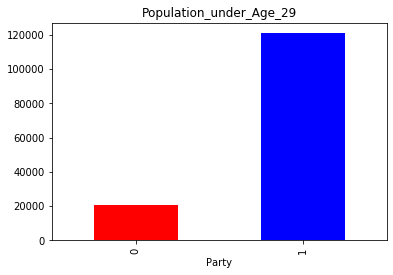

In [18]:
df_combined.groupby("Party")['Population_under_Age_29'].mean().plot(kind='bar',color=["r","b"],title="Population_under_Age_29")

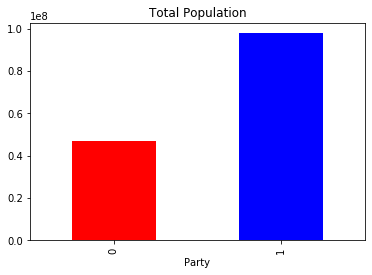

In [19]:
df_combined.groupby("Party")['Total Population'].sum().plot(kind='bar',color=["r","b"],title="Total Population")

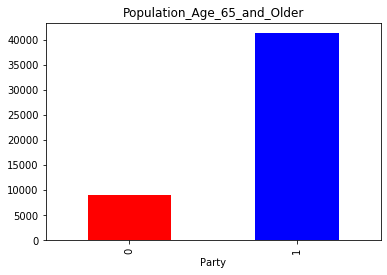

In [20]:
df_combined.groupby("Party")['Population_Age_65_and_Older'].mean().plot(kind='bar',color=["r","b"],title="Population_Age_65_and_Older")

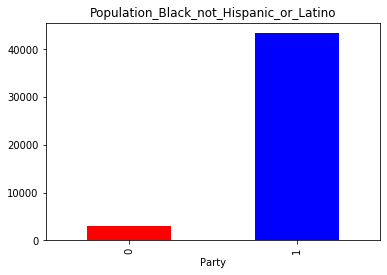

In [21]:

df_combined.groupby("Party")['Population_Black_not_Hispanic_or_Latino'].mean().plot(kind='bar',color=["r","b"],title="Population_Black_not_Hispanic_or_Latino")

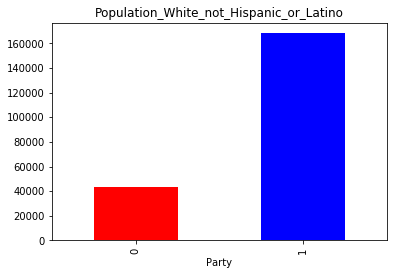

In [15]:
df_combined.groupby("Party")['Population_White_not_Hispanic_or_Latino'].mean().plot(kind='bar',color=["r","b"],title="Population_White_not_Hispanic_or_Latino")

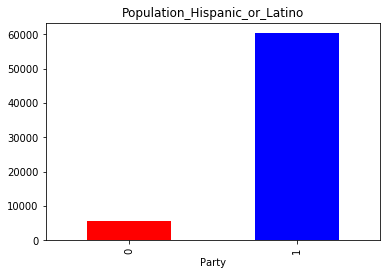

In [16]:
df_combined.groupby("Party")['Population_Hispanic_or_Latino'].mean().plot(kind='bar',color=["r","b"],title="Population_Hispanic_or_Latino")

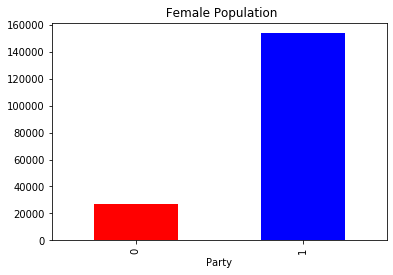

In [17]:
df_combined.groupby("Party")['Population_female'].mean().plot(kind='bar',color=["r","b"],title=" Female Population")

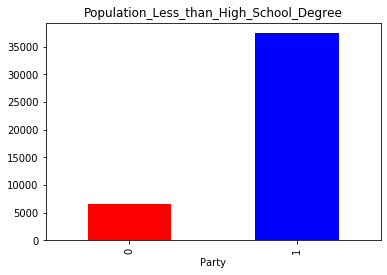

In [18]:
df_combined.groupby("Party")['Population_Less_than_High_School_Degree'].mean().plot(kind='bar',color=["r","b"],title="Population_Less_than_High_School_Degree")

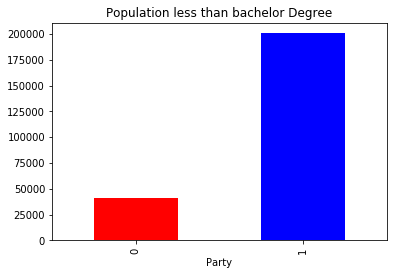

In [19]:
df_combined.groupby("Party")['Population_Less_than_Bachelor\'s Degree'].mean().plot(kind='bar',color=["r","b"],title="Population less than bachelor Degree")

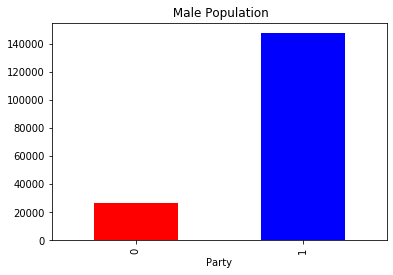

In [20]:
df_combined.groupby("Party")['Population_male'].mean().plot(kind='bar',color=["r","b"],title=" Male Population")